## Written by wanping7

In [1]:
from datetime import datetime

# data process
import numpy as np, pandas as pd
from  datetime import datetime, timedelta

# visualize
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config ZMQInteractiveShell.ast_node_interactivity='all'

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

# sys
import os, sys


import warnings
warnings.filterwarnings('ignore')

# 大小设置
sns.set(rc={'figure.figsize':(13,7)})
# 风格设置
sns.set_style("whitegrid")


PATH = "../data/"

## 结论

###  每个CSV文件用户-项目点击分布

- 用户点击：呈现右尾分布，log1p近似正态。
- 项目被点击：呈现右尾分布，但是在点击量很高的商品中也出现了一个峰，可能是热点商品。
- 时间【最小，90分位数，最大】分布：发现时间随文件重心慢慢转移，说明文件分割是有一定时间顺序。每个均为四个峰左右，说明是四五天左右的数据。
- 每个文件：用户量1700 、项目项4100
- 整体文件：用户量2900 、项目项8900

###  整体CSV文件用户-项目点击分布

- 1546265点击中，将近一半有重复点击
- 时间分布：
    - 9个峰，大概是前后9天的数据
    - 最左边与最右边数据量较中间小，可能左右并非完整的一天数据或者中间包含节假日、促销等成分
    
### 用户画像与用户点击

- 用户画像中有6786个用户，整个训练点击数据用户量在29128，说明有用户画像的只是一部分。
- 用户画像中三个用户重复信息：两个用户年龄变化（更新），一个用户城市变化。

### 合并数据分布

以下分析均为有用户画像的点击数据

- 这些有用户画像的数据：
    - 用户点击量较整体大
    - 项目点击量较整体小
    - 总结：这些有用户画像的人，更爱多次点击那种稀有的物件（可能是需要反复对比的奢饰品牌）

### 有用户画像——性别、年龄、城市分布

- 男女随时间点击趋势均呈现周期性（天）
- 各年龄阶段的访问量大致呈正态分布
- 从城市level看不出城市背后的真实等级
- 男女在年龄上的点击量存在差异性，比如年龄阶段6
- 男女在城市上的点击量差异性看不出。

In [2]:
TEST_PATH = PATH + "underexpose_test/"
TEST_DIRS = os.listdir(TEST_PATH)
TEST_FILES = [i for i in TEST_DIRS if ("underexpose_test_" in i) and ".csv" in i]
TEST_FILES
# # 输出所有文件和文件夹
# for file in dirs:
#     print(file)

['underexpose_test_click-0.csv',
 'underexpose_test_click-1.csv',
 'underexpose_test_click-2.csv',
 'underexpose_test_click-3.csv',
 'underexpose_test_click-4.csv',
 'underexpose_test_click-5.csv',
 'underexpose_test_qtime-0.csv',
 'underexpose_test_qtime-1.csv',
 'underexpose_test_qtime-2.csv',
 'underexpose_test_qtime-3.csv',
 'underexpose_test_qtime-4.csv',
 'underexpose_test_qtime-5.csv']

In [3]:
TRAIN_PATH = PATH + "underexpose_train/"
TRAIN_DIRS = os.listdir(TRAIN_PATH)
TRAIN_FILES = [i for i in TRAIN_DIRS if ("underexpose_" in i) and ".csv" in i]
TRAIN_FILES
# # 输出所有文件和文件夹
# for file in dirs:
#     print(file)

['underexpose_item_feat.csv',
 'underexpose_train_click-0.csv',
 'underexpose_train_click-1.csv',
 'underexpose_train_click-2.csv',
 'underexpose_train_click-3.csv',
 'underexpose_train_click-4.csv',
 'underexpose_train_click-5.csv',
 'underexpose_user_feat.csv']

In [4]:
TRAIN_PATH = PATH + "underexpose_train/"

#  Click特征

- underexpose_train_click-T.csv/underexpose_test_click-T.csv

   - user_id
   - item_id
   - time：点击事件发生时的时间戳，即（unix_timestamp - random_number_1）/ random_number_2
   

## 1 训练Click特征

### 1.1 每个CSV文件用户-项目点击分布

- 用户点击：呈现右尾分布，log1p近似正态。
- 项目被点击：呈现右尾分布，但是在点击量很高的商品中也出现了一个峰，可能是热点商品。
- 时间【最小，90分位数，最大】分布：发现时间随文件重心慢慢转移，说明文件分割是有一定时间顺序。每个均为四个峰左右，说明是四五天左右的数据。
- 每个文件：用户量1700 、项目项4100
- 整体文件：用户量2900 、项目项8900
    


=========> underexpose_train_click-0.csv文件
                     time【MIN, P90, MAX】 [0.98374, 0.98394, 0.98396]
                     用户量.............. 16842
                     项目量.............. 40772
                     用户16 [0.9837661478343862, 0.9839314082881014]


=========> underexpose_train_click-1.csv文件
                     time【MIN, P90, MAX】 [0.98379, 0.984, 0.98401]
                     用户量.............. 16946
                     项目量.............. 41403
                     用户16 []


=========> underexpose_train_click-2.csv文件
                     time【MIN, P90, MAX】 [0.98385, 0.98406, 0.98407]
                     用户量.............. 16708
                     项目量.............. 41027
                     用户16 [0.9839314082881014, 0.984065931883478]


=========> underexpose_train_click-3.csv文件
                     time【MIN, P90, MAX】 [0.9839, 0.98411, 0.98412]
                     用户量.............. 17146
                     项目量.............. 42811
                     用户16 [

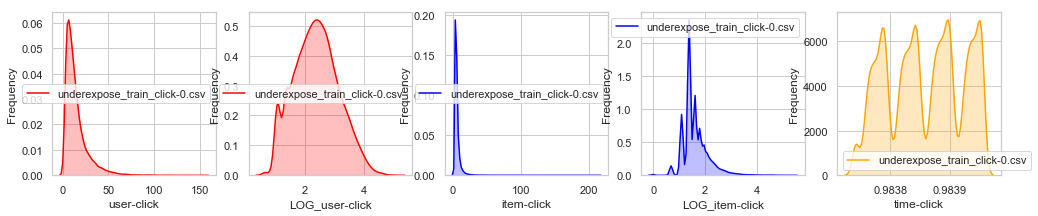

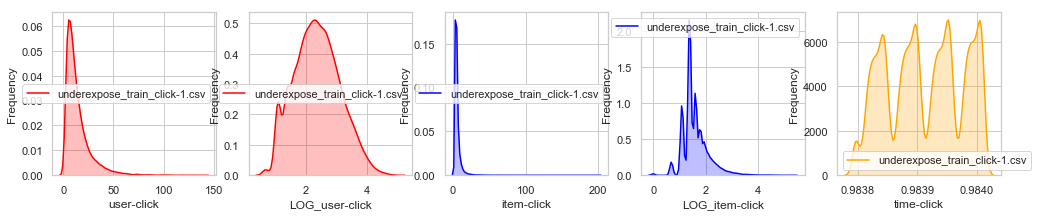

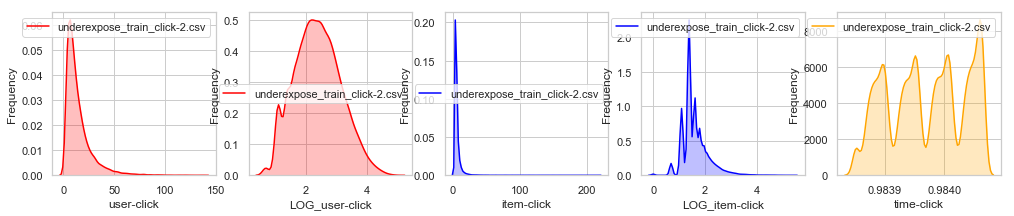

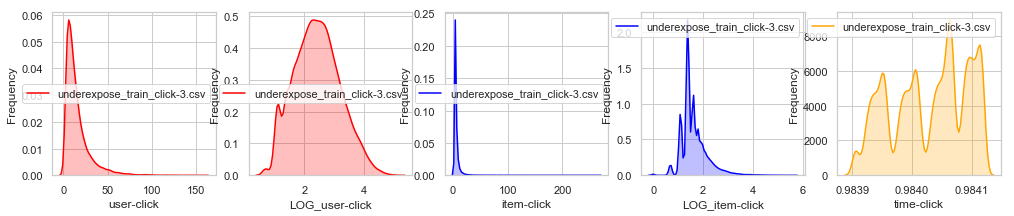

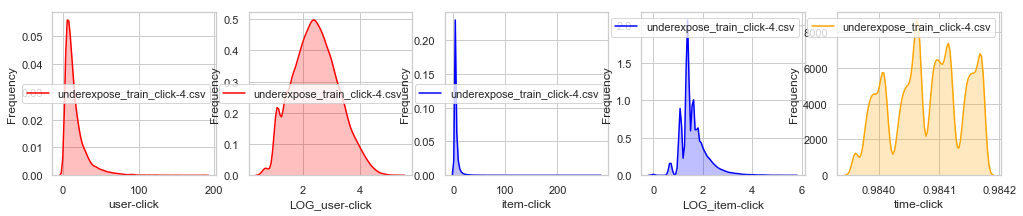

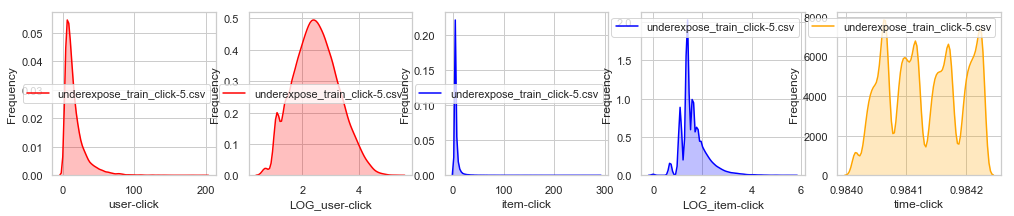

In [62]:
# 大小设置
sns.set(rc={'figure.figsize':(17, 3)})
# 风格设置
sns.set_style("whitegrid")


TRAIN_CLICK_FILES = [i for i in TRAIN_FILES if "underexpose_train_click" in i]
names=["user_id", "item_id", "time"]
for i, TRAIN_CLICK_FILE in enumerate(TRAIN_CLICK_FILES):

    train_click = pd.read_csv(TRAIN_PATH + TRAIN_CLICK_FILE, header=None, names=names)
    #################### 拼接所有train_click数据
    if i == 0:
        merge_train_click = train_click
    else:
        merge_train_click = pd.concat([merge_train_click, train_click], axis=0)
    #################### 用户click统计
    user = train_click[["user_id"]].groupby(["user_id"]).size().reset_index()
    user.columns = ["user_id", "click"]
    #################### 项目click统计
    item = train_click[["item_id"]].groupby(["item_id"]).size().reset_index()
    item.columns = ["item_id", "click"]

    #################### 用户、项目click可视化
    f, axes = plt.subplots(1, 5)
    ######## user-click
    g0 = sns.kdeplot(user["click"], color="Red", shade = True, ax=axes[0])
    x = g0.set_xlabel("user-click")
    x = g0.set_ylabel("Frequency")
    g = g0.legend([TRAIN_CLICK_FILE])
    ## user-click log
    g01 = sns.kdeplot(np.log(user["click"]), color="Red", shade = True, ax=axes[1])
    x = g01.set_xlabel("LOG_user-click")
    x = g01.set_ylabel("Frequency")
    g = g01.legend([TRAIN_CLICK_FILE])
    ######## item-click
    g1 = sns.kdeplot(item["click"], color="Blue", shade = True, ax=axes[2])
    x = g1.set_xlabel("item-click")
    x = g1.set_ylabel("Frequency")
    g1 = g1.legend([TRAIN_CLICK_FILE])
    ## item-click log
    g11 = sns.kdeplot(np.log(item["click"]), color="Blue", shade = True, ax=axes[3])
    x = g11.set_xlabel("LOG_item-click")
    x = g11.set_ylabel("Frequency")
    g11 = g11.legend([TRAIN_CLICK_FILE])
    ######## time-click
    g2 = sns.kdeplot(train_click["time"], color="Orange", shade = True, ax=axes[4])
    x = g2.set_xlabel("time-click")
    x = g2.set_ylabel("Frequency")
    g2 = g2.legend([TRAIN_CLICK_FILE])
    print("=========> {file}文件".format(file=TRAIN_CLICK_FILE))
    print("                     time【MIN, P90, MAX】", [round(train_click.time.min(), 5), 
                                                       round(train_click.time.quantile(0.9), 5), 
                                                       round(train_click.time.max(), 5)])
    print("                     用户量..............", train_click.user_id.unique().shape[0])
    print("                     项目量..............", train_click.item_id.unique().shape[0])
    if sum(train_click.user_id==16):
        print("                     用户16", [min(train_click[train_click.user_id==16]["time"]), 
                                            max(train_click[train_click.user_id==16]["time"])])
    else:
        print("                     用户16", [ ])
    print("\n")

print("=========> 整体")
print("                     time【MIN, P90, MAX】", [round(merge_train_click.time.min(), 5), 
                                                   round(merge_train_click.time.quantile(0.9), 5), 
                                                   round(merge_train_click.time.max(), 5)])
print("                     用户量..............", merge_train_click.user_id.unique().shape[0])
print("                     项目量..............", merge_train_click.item_id.unique().shape[0])

### 1.2 整体CSV文件用户-项目点击分布

- 1546265点击中，将近一半有重复点击
- 时间分布：
    - 9个峰，大概是前后9天的数据
    - 最左边与最右边数据量较中间小，可能左右并非完整的一天数据或者中间包含节假日、促销等成分

#### 拼接文件样本量

In [6]:
print("==============================> 拼接文件样本量：", merge_train_click.shape[0])
merge_train_click.head(2)

==============================> 拼接文件样本量： 1546265


,user_id,item_id,time
0,4965,18,0.983763
1,20192,34,0.983772


#### 对所有列去重之后样本量

In [7]:
merge_train_click_unique = merge_train_click[["user_id", "item_id", "time"]
                                            ].groupby(["user_id", "item_id", "time"]).size().reset_index()
merge_train_click_unique.columns = ["user_id", "item_id", "time", "click"]
print("==============================> 去重后样本量：", merge_train_click_unique.shape[0])
print("==============================> 最大重复click：", merge_train_click_unique.click.max())
merge_train_click_unique.head(2)

==============================> 去重后样本量： 804043
==============================> 最大重复click： 4


,user_id,item_id,time,click
0,1,2945,0.984153,2
1,1,4033,0.984044,2


#### 整体时间分布

- 9个峰，大概是前后9天的数据
- 最左边与最右边数据量较中间小，可能左右并非完整的一天数据或者中间包含节假日、促销等成分

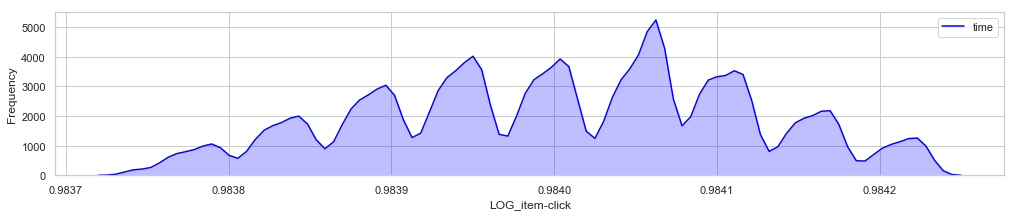

In [8]:
g = sns.kdeplot(merge_train_click["time"], color="Blue", shade = True)
x = g.set_xlabel("LOG_item-click")
x = g.set_ylabel("Frequency")
g = g.legend(["time"])

## 2 用户画像与用户点击

- 用户画像中有6786个用户，整个训练点击数据用户量在29128，说明有用户画像的只是一部分。
- 用户画像中三个用户重复信息：两个用户年龄变化（更新），一个用户城市变化。

### 2.1 数据导入

In [9]:
user_feat = pd.read_csv(TRAIN_PATH + "underexpose_user_feat.csv", header=None, 
                        names=["user_id", "user_age_level", "user_gender", "user_city_level"])

print("==============================> 用户画像原始用户量：", user_feat.shape[0])
print("==============================> 用户画像去重用户量：", user_feat.user_id.unique().shape[0])
print("==============================> 取出重复用户id的数据：")
user_feat[(user_feat.user_id == 32152) | (user_feat.user_id == 23453) | (user_feat.user_id == 14818)]

==============================> 用户画像原始用户量： 6789
==============================> 用户画像去重用户量： 6786
==============================> 取出重复用户id的数据：


,user_id,user_age_level,user_gender,user_city_level
1466,14818,3.0,M,3.0
1467,14818,2.0,M,3.0
5733,23453,5.0,F,2.0
5734,23453,5.0,F,5.0
6513,32152,1.0,F,6.0
6514,32152,2.0,F,6.0


### 2.2 数据合并与筛选

In [10]:
# 重复的用户删除年龄小的记录，删除城市大的记录
user_feat.drop(index=[1467, 6513, 5734], inplace=True)

# 合并用户画像与用户点击数据
trainClick_userFeat = merge_train_click.merge(user_feat, how="left", on=["user_id"])

# 筛选有用户画像的点击数据
trainClick_userFeat = trainClick_userFeat[~(trainClick_userFeat.user_age_level.isnull()) | 
                                          ~(trainClick_userFeat.user_gender.isnull()) | 
                                          ~(trainClick_userFeat.user_city_level.isnull())]

print("==============================> 用户画像与点击数据合并：")
trainClick_userFeat.head(2)

==============================> 用户画像与点击数据合并：


,user_id,item_id,time,user_age_level,user_gender,user_city_level
0,4965,18,0.983763,4.0,F,1.0
3,29473,189,0.983930,4.0,F,3.0


### 2.3 合并数据分布

以下分析均为有用户画像的点击数据

- 这些有用户画像的数据：
    - 用户点击量较整体大
    - 项目点击量较整体小
    - 总结：这些有用户画像的人，更爱多次点击那种稀有的物件（可能是需要反复对比的奢饰品牌）

#### 有用户画像与整体点击——用户、项目分布

- 检验分布是否一致

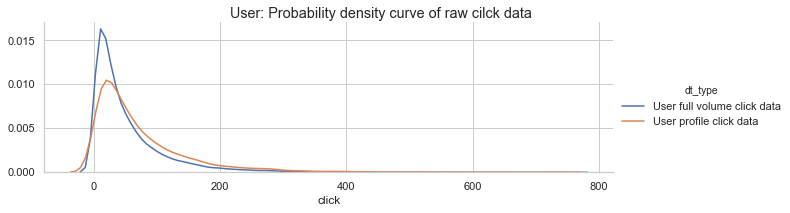

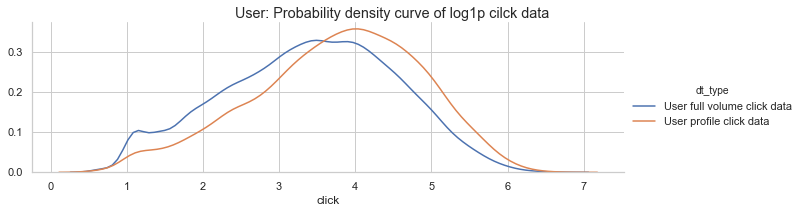

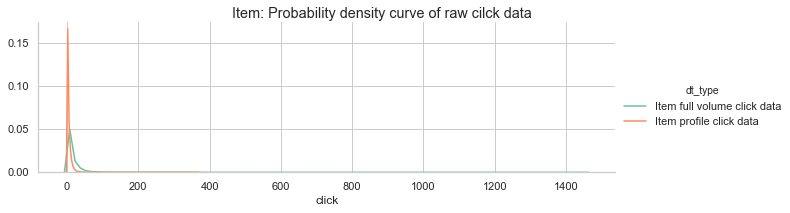

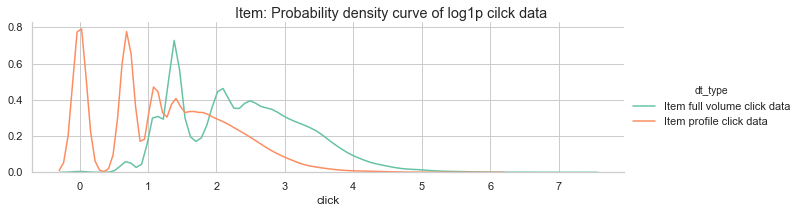

In [11]:
#################### 用户click统计
click_user = trainClick_userFeat[["user_id"]].groupby(["user_id"]).size().reset_index()
click_user.columns = ["user_id", "click"]

all_click_user = merge_train_click[["user_id"]].groupby(["user_id"]).size().reset_index()
all_click_user.columns = ["user_id", "click"]


#################### 项目click统计
click_item = trainClick_userFeat[["item_id"]].groupby(["item_id"]).size().reset_index()
click_item.columns = ["item_id", "click"]

all_click_item = merge_train_click[["item_id"]].groupby(["item_id"]).size().reset_index()
all_click_item.columns = ["item_id", "click"]

################################## USER
tmp0 = all_click_user.copy()
tmp0["dt_type"] = "User full volume click data"
tmp1 = click_user.copy()
tmp1["dt_type"] = "User profile click data"
tmp00 = pd.concat([tmp0, tmp1], axis=0)

### raw
g = sns.FacetGrid(tmp00, hue="dt_type", size=3, aspect=3)
g.map(sns.kdeplot, "click")
g.fig.suptitle("User: Probability density curve of raw cilck data")
g.add_legend();

### log1p
tmp00["click"] = np.log(tmp00.click)
g = sns.FacetGrid(tmp00, hue="dt_type", size=3, aspect=3)
g.map(sns.kdeplot, "click")
g.fig.suptitle("User: Probability density curve of log1p cilck data")
g.add_legend();


################################## ITEM

tmp0 = all_click_item.copy()
tmp0["dt_type"] = "Item full volume click data"
tmp1 = click_item.copy()
tmp1["dt_type"] = "Item profile click data"
tmp11 = pd.concat([tmp0, tmp1], axis=0)

### raw
g = sns.FacetGrid(tmp11, hue="dt_type", palette="Set2", size=3, aspect=3)
g.map(sns.kdeplot, "click")
g.fig.suptitle("Item: Probability density curve of raw cilck data")
g.add_legend();

### log1p
tmp11["click"] = np.log(tmp11.click)
g = sns.FacetGrid(tmp11, hue="dt_type", palette="Set2", size=3, aspect=3)
g.map(sns.kdeplot, "click")
g.fig.suptitle("Item: Probability density curve of log1p cilck data")
g.add_legend();

#### 有用户画像——性别、年龄、城市分布

- 男女随时间点击趋势均呈现周期性（天）
- 各年龄阶段的访问量大致呈正态分布
- 从城市level看不出城市背后的真实等级
- 男女在年龄上的点击量存在差异性，比如年龄阶段6
- 男女在城市上的点击量差异性看不出。

In [12]:
trainClick_userFeat.head(2)

,user_id,item_id,time,user_age_level,user_gender,user_city_level
0,4965,18,0.983763,4.0,F,1.0
3,29473,189,0.983930,4.0,F,3.0


- 性别-年龄点击量

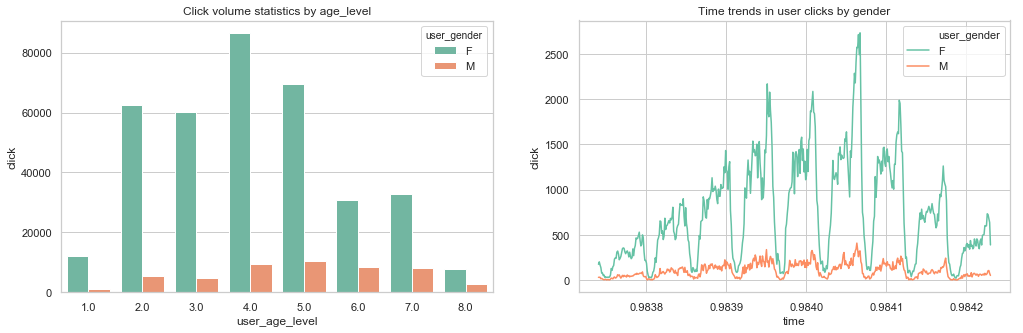

In [13]:
# 大小设置
sns.set(rc={'figure.figsize':(17, 5)})
# 风格设置
sns.set_style("whitegrid")

# 可视化
f, axes = plt.subplots(1, 2)
# 1
trainClick_userFeat_cp = trainClick_userFeat.copy()
trainClick_userFeat_cp["time"] = trainClick_userFeat_cp["time"].map(lambda x:round(x, 5))
sex_age_click = trainClick_userFeat_cp[["user_gender", "user_age_level"]].groupby(["user_gender", "user_age_level"]).size().reset_index()
sex_age_click.columns = ["user_gender", "user_age_level", "click"]
x = sns.barplot(x="user_age_level", y="click", hue="user_gender", data=sex_age_click, palette=sns.color_palette("Set2", 6), ax=axes[0])
x = x.set_title("Click volume statistics by age_level")

# 2
trainClick_userFeat_cp = trainClick_userFeat.copy()
trainClick_userFeat_cp["time"] = trainClick_userFeat_cp["time"].map(lambda x:round(x, 6))
sex_time = trainClick_userFeat_cp[["user_gender", "time"]].groupby(["user_gender", "time"]).size().reset_index()
sex_time.columns = ["user_gender", "time", "click"]
x = sns.lineplot(x="time", y="click", data=sex_time, hue="user_gender", palette=sns.color_palette("Set2", 2), ax=axes[1])
x = x.set_title("Time trends in user clicks by gender")


- 性别-年龄点击量趋势

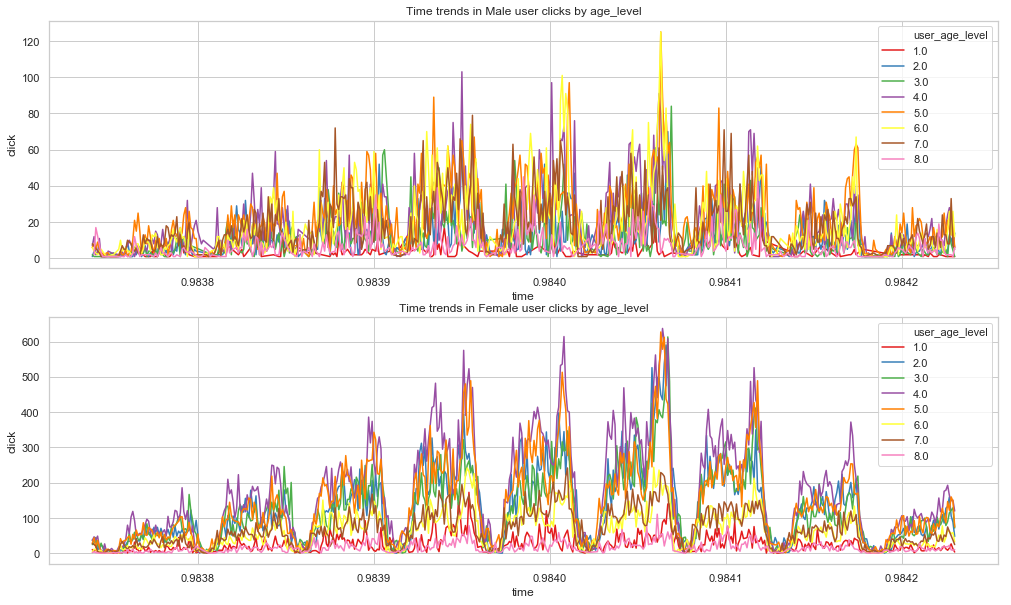

In [16]:
# 大小设置
sns.set(rc={'figure.figsize':(17, 10)})
# 风格设置
sns.set_style("whitegrid")

# 聚合数据
sex_age_time = trainClick_userFeat_cp[["user_gender", "user_age_level", "time"]
                                     ].groupby(["user_gender", "user_age_level", "time"]).size().reset_index()
sex_age_time.columns = ["user_gender", "user_age_level", "time", "click"]

# 可视化
# 1
f, axes = plt.subplots(2, 1)
x0 = sns.lineplot(x="time", y="click", data=sex_age_time[sex_age_time.user_gender=="M"], hue="user_age_level", 
                  palette=sns.color_palette("Set1", 8), ax=axes[0])
x0 = x0.set_title("Time trends in Male user clicks by age_level")
# 2
x1 = sns.lineplot(x="time", y="click", data=sex_age_time[sex_age_time.user_gender=="F"], hue="user_age_level", 
                  palette=sns.color_palette("Set1", 8), ax=axes[1])
x1 = x1.set_title("Time trends in Female user clicks by age_level")

- 性别-城市点击量

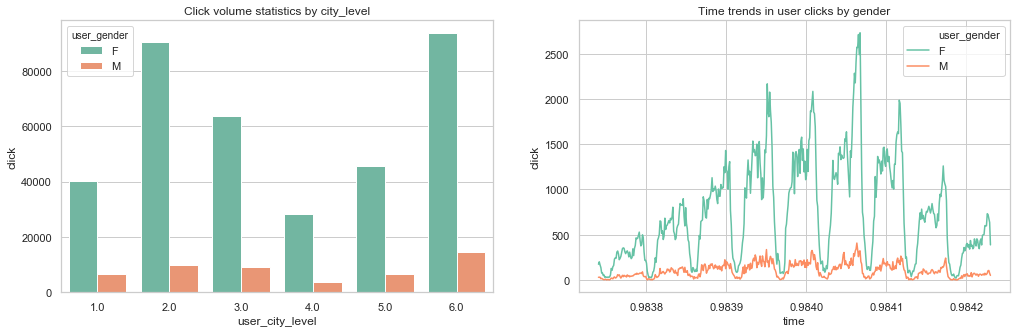

In [17]:
# 大小设置
sns.set(rc={'figure.figsize':(17, 5)})
# 风格设置
sns.set_style("whitegrid")

# 可视化
f, axes = plt.subplots(1, 2)
# 1
trainClick_userFeat_cp = trainClick_userFeat.copy()
trainClick_userFeat_cp["time"] = trainClick_userFeat_cp["time"].map(lambda x:round(x, 5))
sex_city_click = trainClick_userFeat_cp[["user_gender", "user_city_level"]].groupby(["user_gender", "user_city_level"]).size().reset_index()
sex_city_click.columns = ["user_gender", "user_city_level", "click"]
x = sns.barplot(x="user_city_level", y="click", hue="user_gender", data=sex_city_click, palette=sns.color_palette("Set2", 6), ax=axes[0])
x = x.set_title("Click volume statistics by city_level")

# 2
trainClick_userFeat_cp = trainClick_userFeat.copy()
trainClick_userFeat_cp["time"] = trainClick_userFeat_cp["time"].map(lambda x:round(x, 6))
sex_time = trainClick_userFeat_cp[["user_gender", "time"]].groupby(["user_gender", "time"]).size().reset_index()
sex_time.columns = ["user_gender", "time", "click"]
x = sns.lineplot(x="time", y="click", data=sex_time, hue="user_gender", palette=sns.color_palette("Set2", 2), ax=axes[1])
x = x.set_title("Time trends in user clicks by gender")

- 性别-城市点击量趋势

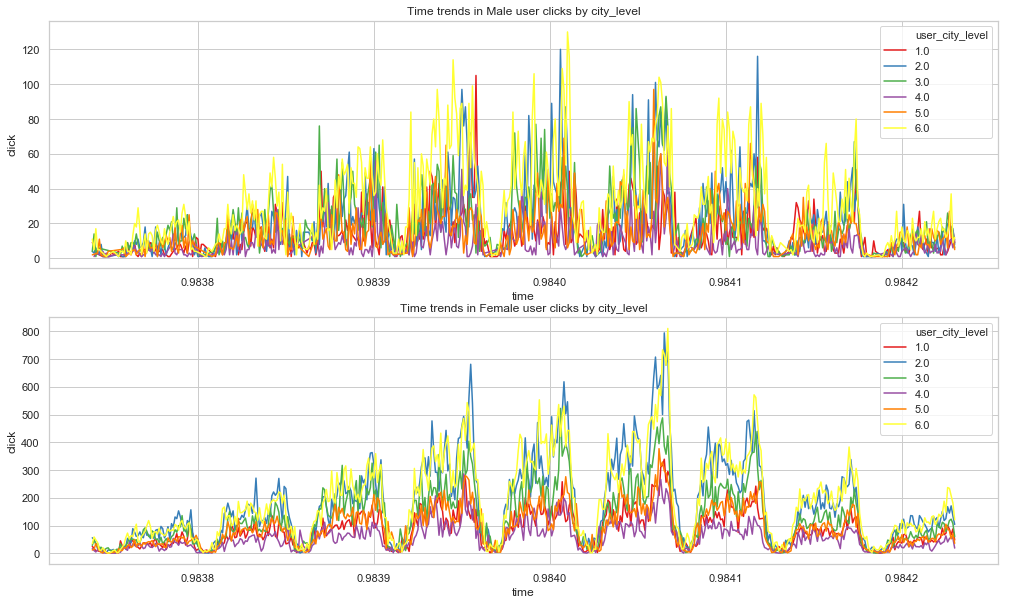

In [18]:
# 大小设置
sns.set(rc={'figure.figsize':(17, 10)})
# 风格设置
sns.set_style("whitegrid")

# 聚合数据
sex_city_time = trainClick_userFeat_cp[["user_gender", "user_city_level", "time"]
                                     ].groupby(["user_gender", "user_city_level", "time"]).size().reset_index()
sex_city_time.columns = ["user_gender", "user_city_level", "time", "click"]

# 可视化
# 1
f, axes = plt.subplots(2, 1)
x0 = sns.lineplot(x="time", y="click", data=sex_city_time[sex_city_time.user_gender=="M"], hue="user_city_level", 
                  palette=sns.color_palette("Set1", 6), ax=axes[0])
x0 = x0.set_title("Time trends in Male user clicks by city_level")
# 2
x1 = sns.lineplot(x="time", y="click", data=sex_city_time[sex_city_time.user_gender=="F"], hue="user_city_level", 
                  palette=sns.color_palette("Set1", 6), ax=axes[1])
x1 = x1.set_title("Time trends in Female user clicks by city_level")